# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Rayhan Adi Wicaksono
- **Email:** rayhan.a.wicaksono@gmail.com
- **ID Dicoding:** acedia

## Menentukan Pertanyaan Bisnis

- Kota mana yang mengeluarkan uang terbanyak pada platform e-commerce tersebut?
- Kategori produk apa yang paling diminati di masing-masing state?
- Secara keseluruhan, kategori produk apa yang paling banyak dibeli pada platform e-commerce tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import geopandas as gpd
import matplotlib.colors as mcolors

## Data Wrangling

### Gathering Data

#### Import dataset yang dibutuhkan untuk menjawab pertanyaan.

Dataset yang dibutuhkan untuk menjawab pertanyaan tersebut antara lain:

- **Order Payment Dataset** <br>
Digunakan untuk mendapatkan total uang yang telah ditransaksikan (payment_value) oleh tiap pesanan (order_id) <br>
- **Orders Dataset** <br>
Digunakan untuk menghubungkan order dan customer <br>
- **Customer Dataset** <br>
Digunakan untuk mengelompokkan customer berdasarkan kotanya (customer_city) <br>
- **Order Items Dataset** <br>
Digunakan untuk mengetahui tiap produk untuk masing masing transaksi. <br>
- **Products Dataset** <br>
Digunakan untuk mengelompkkan produk berdasarkan kategorinya <br>
- **Product Category Name Translation Dataset** <br>
Digunakan untuk men-translate kategori produk kedalam bahasa inggris yang lebih dimengerti oleh developer. <br>
- **Geolocation Dataset** <br>
Digunakan untuk visualisasi menggunakan peta<br>

In [2]:
# Import dataset into dataframe

# Orders Payments Dataset
order_payments_df = pd.read_csv("data/raw/order_payments_dataset.csv")

# Orders Dataset
orders_df = pd.read_csv("data/raw/orders_dataset.csv")

# Customers Dataset
customers_df = pd.read_csv("data/raw/customers_dataset.csv")

# Order Items Dataset
order_items_df = pd.read_csv("data/raw/order_items_dataset.csv")

# Products Dataset
products_df = pd.read_csv("data/raw/products_dataset.csv")

# Product Category Name Translation Dataset
product_category_name_translation_df = pd.read_csv("data/raw/product_category_name_translation.csv")

# Geolocation Dataset
geolocation_df = pd.read_csv("data/raw/geolocation_dataset.csv")

#### Menyiapkan order_payments Dataset

Sebelum menggunakan dataset order_payments dan menggabungkan dataset tersebut dengan dataframe lainnya, diketahui dari metadata bahwa satu proses order (order id) dapat memiliki lebih dari satu row pembayaran karena opsi installment / cicilan. Hal tersebut juga dapat divalidasi oleh kode berikut. 

In [3]:
# Check for duplicate order_id in order_items_df
duplicate_order_payments = order_payments_df[order_payments_df.duplicated('order_id', keep=False)]

# Display the duplicate order_ids
duplicate_order_payments.shape

(7407, 5)

Terlihat bahwa ada 7407 order id yang duplikat. Maka dari itu, dilakukan proses group by per order id untuk mendapatkan jumlahan dari payment_value untuk tiap order

In [4]:
order_payments_df = order_payments_df[['order_id', 'payment_value']]

# Group by 'id' and sum the 'value' column
order_payments_df = order_payments_df.groupby('order_id')['payment_value'].sum().reset_index()
order_payments_df.head()

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


#### Merge orders_df dengan order_payments_df dan customer_df untuk menjawab pertanyaan pertama pada merged_df_1

In [5]:
# Merge orders_df with order_payments_df into merged_df
merged_df_1 = pd.merge(orders_df, order_payments_df, on='order_id', how='inner')

# merge merged_df with customers_df
merged_df_1 = pd.merge(merged_df_1, customers_df, on='customer_id', how='inner')



#### Merge merged_df_1 dengan order_items untuk menjawab pertanyaan kedua dan ketiga pada merged_df_2

In [6]:
# merge merged_df with customers_df
merged_df_2 = pd.merge(merged_df_1, order_items_df, on='order_id', how='right')

In [7]:
merged_df_2.shape

(112650, 19)

#### Merge merged_df_2 dengan products_dataset

In [8]:
# merge merged_df with products_df
merged_df_2 = pd.merge(merged_df_2, products_df, on='product_id', how='left')

In [9]:
merged_df_2.shape

(112650, 27)

#### Merge merged_df_2 dengan product_category_name_translation 

In [10]:
# Merge merged_df_2 with product_category_name_translation_df to translate 'category_en' into 'category_id'
merged_df_2 = pd.merge(merged_df_2, product_category_name_translation_df, on='product_category_name', how='left')

In [11]:
merged_df_2.shape

(112650, 28)

#### Merge kedua dataframe dengan geolocation untuk visualisasi

In [12]:
# # Merge df1 with df2 to translate 'category_en' into 'category_id'
# merged_df_1 = pd.merge(merged_df_1, geolocation_df, left_on='customer_city',right_on='geolocation_city',how='left')

# # Merge merged_df_2 with geolocation_df to get 'geolocation' data
# merged_df_2 = pd.merge(merged_df_2, geolocation_df, left_on='customer_city',right_on='geolocation_city', how='left')

**Insight:**
- Satu proses order (order id) dapat memiliki lebih dari satu row pembayaran karena opsi installment / cicilan.
- Satu proses order (order id) bisa memiliki lebih dari satu row pada order_items karena pada satu order, bisa saja membeli lebih dari satu produk.

### Assessing Data

#### Null Value Checking

Pertama, mari kita cek null value pada merged_df_1

In [13]:
merged_df_1.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

Terlihat bahwa terdapat null value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Namun, ketiga kolom tersebut tidak akan digunakan untuk menjawab pertanyaan nomor satu. Maka dari itu, null handling tidak diterapkan pada merged_df_1 karena kolom tersebut nantinya tidak akan dipakai

Selanjutnya, mari cek nilai null pada merged_df_2

In [14]:
merged_df_2.isnull().sum()

order_id                            0
customer_id                         3
order_status                        3
order_purchase_timestamp            3
order_approved_at                  18
order_delivered_carrier_date     1197
order_delivered_customer_date    2457
order_estimated_delivery_date       3
payment_value                       3
customer_unique_id                  3
customer_zip_code_prefix            3
customer_city                       3
customer_state                      3
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_widt

Karena ada row yang memiliki nilai null pada kolom product_category_name, yang mana tanpa nilai tersebut, kita tidak bisa mengelompokkan produk berdasarkan kategorinya. Selain itu, kita juga tidak bisa mengelompokkan row yang memiliki nilai null pada customer_city. Maka dari itu, kita akan men-drop baris (row) dengan nilai null pada dua kolom tersebut.

Proses Drop akan dilakukan pada tahap data cleaning

#### Outlier Checking

Pada kasus ini, kolom yang paling krusial untuk dicek outliernya adalah kolom payment_value, yang mana digunakan untuk menghitung jumlah pembayaran per kota. Maka dari itu, akan dilakukan pengecekan outlier dengan metode IQR.

In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = merged_df_1["payment_value"].quantile(0.25)
Q3 = merged_df_1["payment_value"].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get outliers
outliers = merged_df_1[(merged_df_1["payment_value"] < lower_bound) | (merged_df_1["payment_value"] > upper_bound)]

outliers.shape

(7866, 13)

Terlihat bahwa terdapat 7866 row yang dianggap sebagai outlier. Namun, perlu diketahui bahwa pada kasus ini, pembelian dengan jumlah besar merupakan hal yang wajar walaupun berada diluar IQR threshold. Mari kita lihat nilai transaksi paling besar yang ada.

In [16]:
# Get the maximum value in the 'value' column
max_value = merged_df_1['payment_value'].max()

print(f"The maximum value is: {max_value}")

The maximum value is: 13664.08


Bisa dilihat bahwa outlier terbesar masihlah wajar dalam konteks jumlah transaksi. Sekarang mari lihat nilai terkecilnya.

In [17]:
# Get the minimum value in the 'value' column
min_value = merged_df_1['payment_value'].min()

print(f"The maximum value is: {min_value}")

The maximum value is: 0.0


Nilainya tidaklah negatif, jadi masih masuk akal, sehingga tidak perlu dilakukan outlier handling.

**Insight:**
- Terdapat null value pada beberapa kolom, namun sebagian besar dapat diabaikan karena pada akhirnya, kolom tersebut tidak dipakai
- Terdapat Null value pada kolom yang penting dalam menjawab pertanyaan. Null value pada kolom ini perlu di-handling.
- Terdapat nilai yang dianggap sebagai outlier pada kolom payment_value, namun secara domain knowledge masih masuk akal sehingga tidak perlu di-handling.

### Cleaning Data

Pada proses ini, kita akan menghandle row yang memiliki null value pada kolom product_category_name dan customer_city. Hal ini didasarkan oleh analisis proses sebelumnya. 

In [18]:
merged_df_2 = merged_df_2.dropna(subset=['product_category_name','customer_city'])

Kita cek kembali

In [19]:
merged_df_2.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1157
order_delivered_customer_date    2388
order_estimated_delivery_date       0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_widt

Bisa kita lihat bahwa sudah tidak ada baris yang memiliki null pada kolom product_category_name dan customer_city. Untuk nilai null yang lain tidak masalah karena kolom tersebut tidak akan dipakai.

**Insight:**
- Nilai null pada kolom product_category_name dan customer_city sudah tidak ada sehingga fitur tersebut sudah dapat digunakan dalam EDA dan visualisasi.

## Exploratory Data Analysis (EDA)

### Eksplorasi Kota dengan Total Pembayaran Terbanyak

Sekarang, kita akan mulai menjawab pertanyaan yang dibentuk diawal. Pertama, kita akan menghitung jumlah pembayaran untuk tiap kota

In [20]:
# Group by 'customer_city' and sum the 'payment_value' column
city_payment_sum = merged_df_1.groupby('customer_city')['payment_value'].sum().reset_index()

# Display the result
city_payment_sum.head()

,customer_city,payment_value
0,abadia dos dourados,413.50
1,abadiania,1025.52
2,abaete,1946.81
3,abaetetuba,4672.27
4,abaiara,332.15


Selanjutnya, akan kita urutkan dari besar ke kecil

In [21]:
# Sort city_payment_sum by 'payment_value' in descending order
city_payment_sum_sorted = city_payment_sum.sort_values(by='payment_value', ascending=False)

# Display the sorted DataFrame
city_payment_sum_sorted.head()

,customer_city,payment_value
3597,sao paulo,2203373.09
3155,rio de janeiro,1161927.36
453,belo horizonte,421765.12
558,brasilia,354216.78
1143,curitiba,247392.48


Bisa kita lihat bahwa kota dengan Sao Paolo merupakan kota dengan spending terbesar yaitu pada angka 2203373.09, diikuti dengan rio de janeiro dengan pengeluaran sebesar 1161927.36 dan belo horizonte dengan pengeluaran sebesar 421765.12.

### Eksplorasi Kategori Produk Paling diminati dari masing masing state.

Pada bagian ini, kita akan mencari tahu kategori produk paling diminati dari masing masing state. Pertama, kita akan menghitung jumlah row / pesanan untuk tiap pasang state dan kategori.

In [22]:
# Group by 'customer_state' and 'product_category_name_english', and count the rows
grouped_df = merged_df_2.groupby(['customer_state', 'product_category_name_english']).size().reset_index(name='row_count')

In [23]:
grouped_df

,customer_state,product_category_name_english,row_count
0,AC,auto,4
1,AC,baby,3
2,AC,bed_bath_table,4
3,AC,books_general_interest,2
4,AC,christmas_supplies,1
...,...,...,...
1351,TO,sports_leisure,25
1352,TO,stationery,3
1353,TO,telephony,21
1354,TO,toys,13


Sekarang, dataframe grouped_df telah menyajikan berapa kali tiap kategori dibeli di suatu state (row_count). Selanjutnya, untuk tiap state, diambil satu kategori dengan row_count tertinggi

In [24]:
# Get the row with the highest 'row_count' for each 'customer_city'
idx = grouped_df.groupby('customer_state')['row_count'].idxmax()

# Filter the DataFrame based on the index of the max row_count for each city
df_highest = grouped_df.loc[idx].reset_index(drop=True)

In [25]:
df_highest.head(5)

,customer_state,product_category_name_english,row_count
0,AC,furniture_decor,12
1,AL,health_beauty,63
2,AM,health_beauty,20
3,AP,health_beauty,10
4,BA,health_beauty,350


Dengan demikian, kita telah mendapatkan kategori paling diminati di tiap state. Mari kita coba hitung berapa banyak state yang berminat pada suatu kategori

In [26]:
df_highest.product_category_name_english.value_counts()

product_category_name_english
health_beauty      16
bed_bath_table      6
sports_leisure      3
furniture_decor     2
Name: count, dtype: int64

Bisa dilihat bahwa produk health and beauty menjadi produk paling diminati di 16 state.

### Eksplorasi Kategori Platform Paling Diminati di Platform Tersebut

Sebagai tambahan, mari kita coba lihat kategori apa yang paling diminati di platform tersebut.

In [27]:
# Group by 'product_category_name_english' and count the occurrences
product_category_counts = merged_df_2['product_category_name_english'].value_counts().reset_index()

# Rename the columns for better readability
product_category_counts.columns = ['product_category_name_english', 'count']


Bisa kita lihat bahwa tiga kategori produk terlaris adalah kategori bed_bath_table, health_beauty, dan sports_leisure.

**Insight:**
- Kota dengan Sao Paolo merupakan kota dengan spending terbesar yaitu pada angka 2203373.09, diikuti dengan rio de janeiro dengan pengeluaran sebesar 1161927.36 dan belo horizonte dengan pengeluaran sebesar 421765.12.
- Produk health and beauty menjadi produk paling diminati di 16 state.
- Tiga kategori produk terlaris di platform e-commerce tersebut adalah kategori bed_bath_table, health_beauty, dan sports_leisure.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota mana yang mengeluarkan uang terbanyak pada platform e-commerce tersebut?

Untuk melihat bagaimana pengeluaran dari tiap kota, kita akan menggunakan bar chart

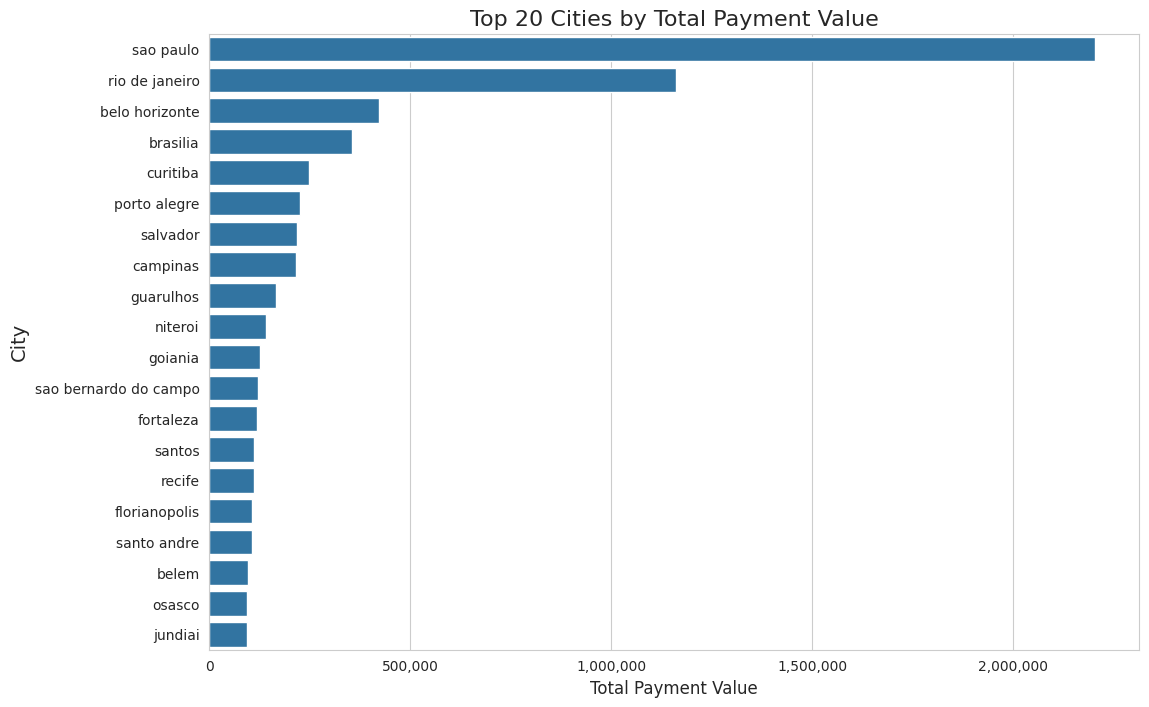

In [30]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# Create a horizontal barplot by swapping x and y
barplot = sns.barplot(
    x='payment_value',  
    y='customer_city', 
    data=city_payment_sum_sorted.head(20)  
)

# Add a title and labels
barplot.set_title('Top 20 Cities by Total Payment Value', fontsize=16)
barplot.set_xlabel('Total Payment Value', fontsize=12)
barplot.set_ylabel('City', fontsize=14)

# Set the x-axis to use a regular number format
barplot.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()


Bisa kita lihat bahwa jumlah pembayaran terbesar datang dari kota Sao Paolo, lebih besar hampir dua kali lipat daripada ranking dua yaitu kota Rio de Janerio. Selain itu, pembayaran dari kota Rio de Janerio sekitar dua sampai tiga kali lipat daripada ranking tiga yaitu Belo Horizonte. Adapun selisih antar ranking selanjutnya cenderung tidak se ekstrim selisih rank 1-2 dan rank 2-3. 

### Pertanyaan 2: Kategori produk apa yang paling diminati di masing-masing state?

Untuk menjawab pertanyaan kedua, kita akan menggunakan library geojson untuk memetakan kategori tiap state. Disini digunakan data tambahan berupa data geojson dari state di negara Brazil.

/tmp/ipykernel_33543/2565177328.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_categories))  # Using 'tab20' colormap with 20 distinct colors
/tmp/ipykernel_33543/2565177328.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid
/tmp/ipykernel_33543/2565177328.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf['product_category_name_english']):


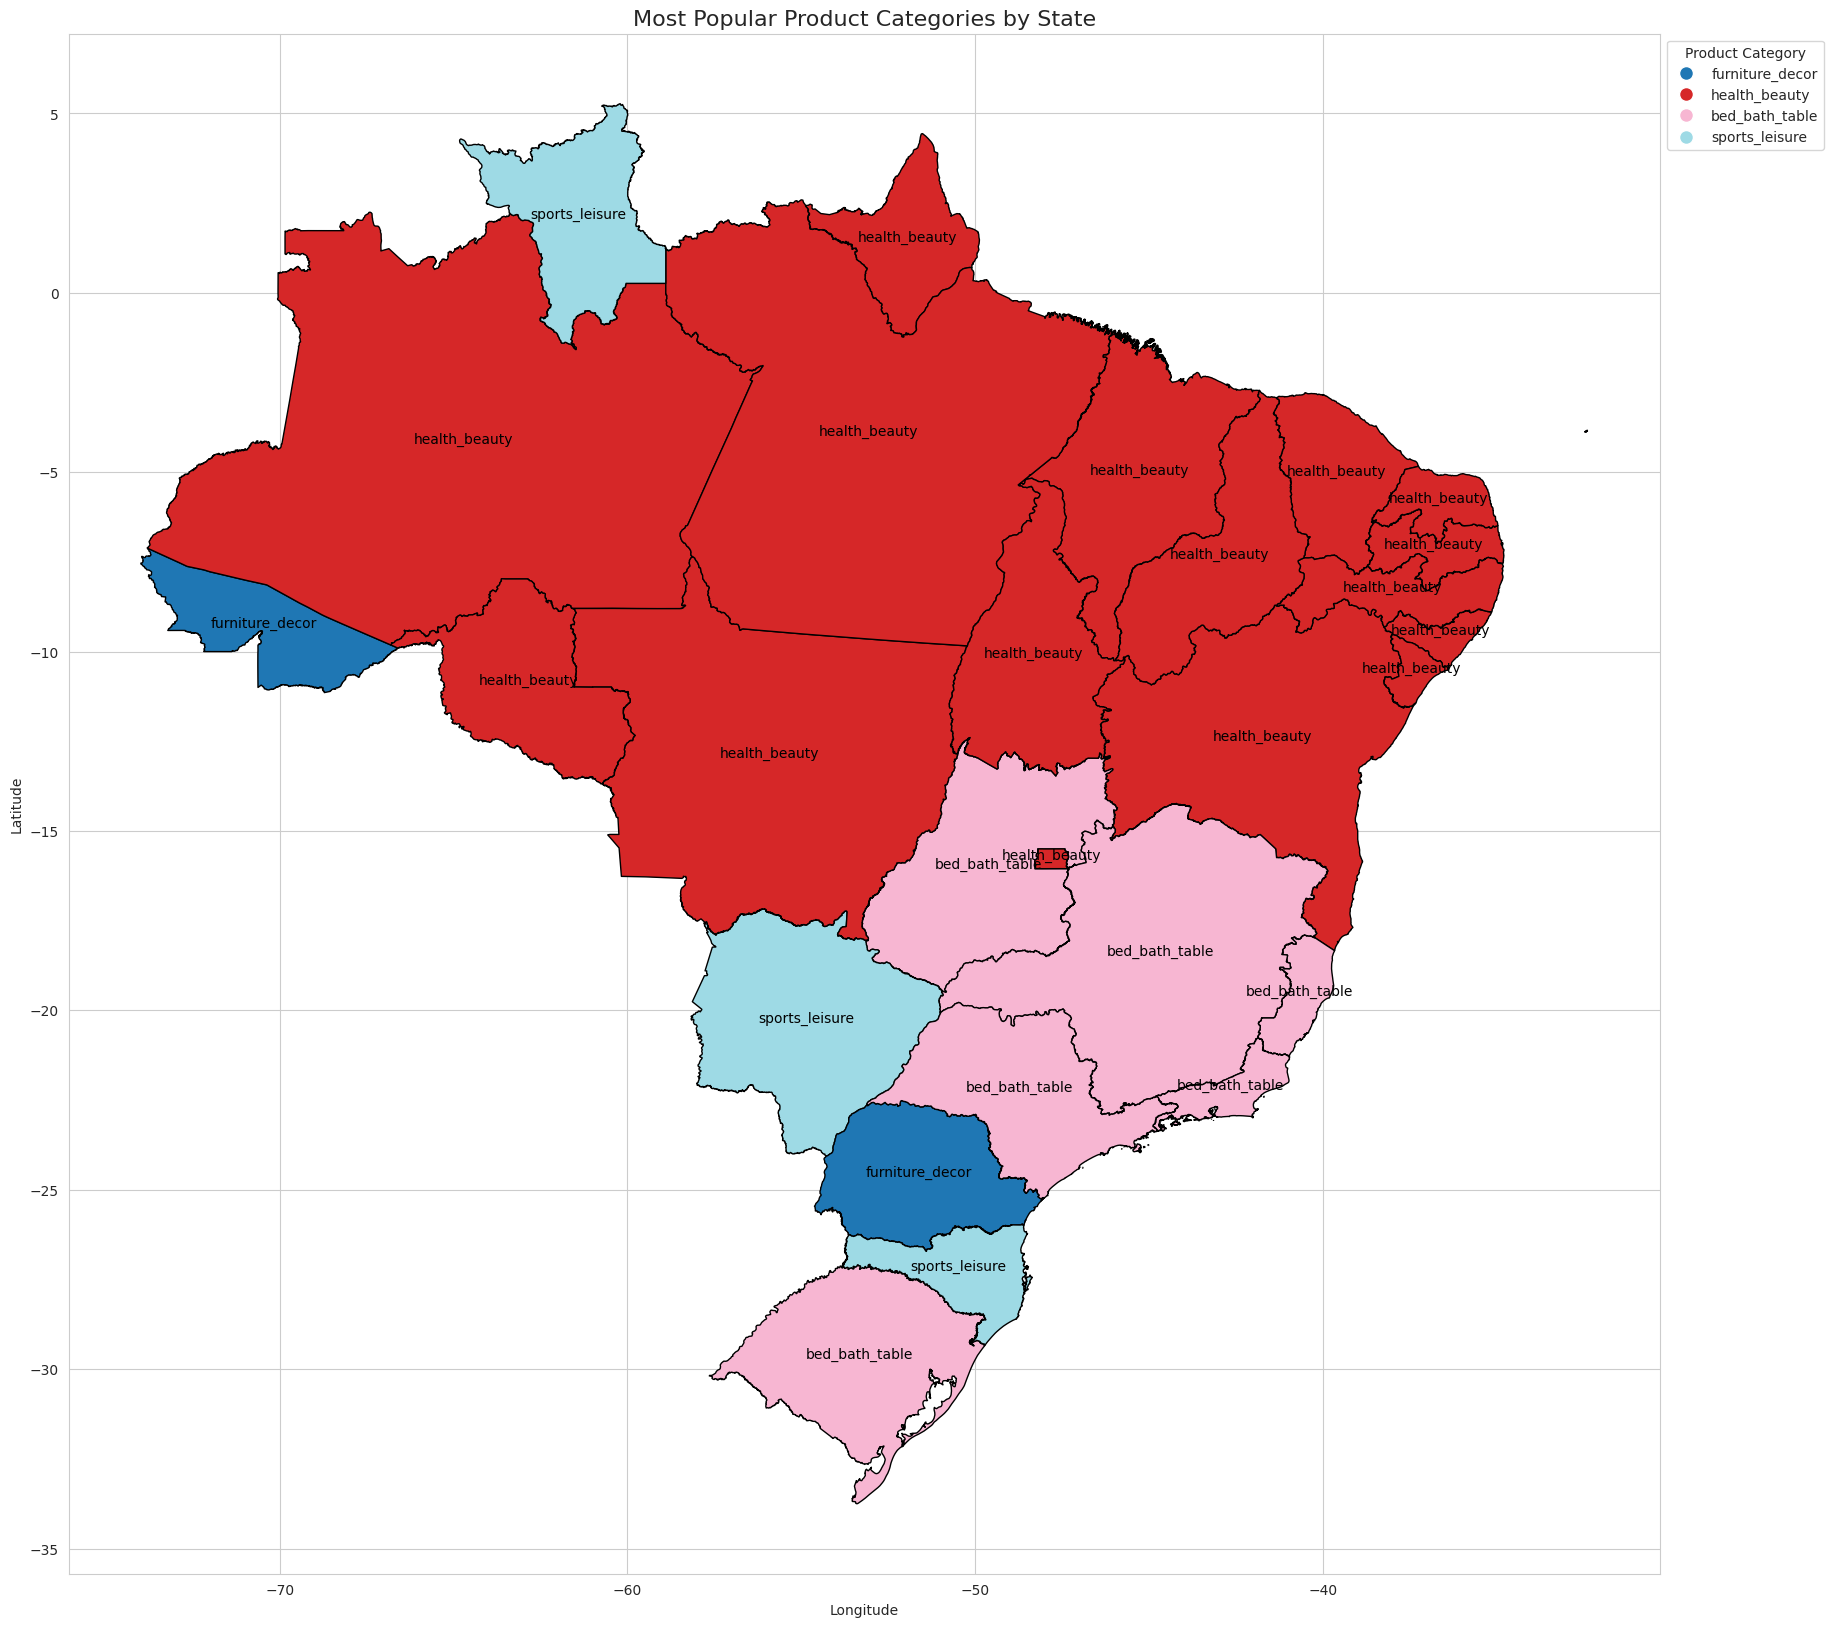

In [36]:


# Load GeoJSON file
geojson_file = 'data/brazil-states.geojson'
gdf = gpd.read_file(geojson_file)

# Merge GeoDataFrame with df_highest based on 'sigla' and 'customer_state'
gdf = gdf.merge(df_highest, left_on='sigla', right_on='customer_state', how='left')

# Create a color map for the product categories
unique_categories = gdf['product_category_name_english'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_categories))  
category_color_map = {category: colors(i) for i, category in enumerate(unique_categories)}

# Assign colors to the states based on their category
gdf['color'] = gdf['product_category_name_english'].map(category_color_map)

# Create a plot
fig, ax = plt.subplots(figsize=(30, 20))
gdf.plot(ax=ax, color=gdf['color'], edgecolor='black')

# Calculate centroids of the polygons
gdf['centroid'] = gdf.geometry.centroid

# Add labels to the centroids showing the product_category_name_english
for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf['product_category_name_english']):
    ax.text(x, y, label, fontsize=10, ha='center', color='black')

# Add title and labels
plt.title('Most Popular Product Categories by State', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=category_color_map[category], markersize=10) 
           for category in unique_categories]
ax.legend(handles, unique_categories, title="Product Category", loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


Peta tersebut memvisualisasikan bagaimana sebaran kategori paling diminati di tiap state. Bisa dilihat bahwa jika dilihat dalam konteks kategori dengan state peminat terbanyak,maka bisa dilihat bahwa kategori health and beauty mendominasi transaksi di Brazil.

### Pertanyaan 3: Secara keseluruhan, kategori produk apa yang paling banyak dibeli pada platform e-commerce tersebut?

Adapun untuk menjawab pertanyaan ini, kita juga akan menggunakan barchart. Kita akan menampilkan 10 kategori produk dengan pembelian terbanyak

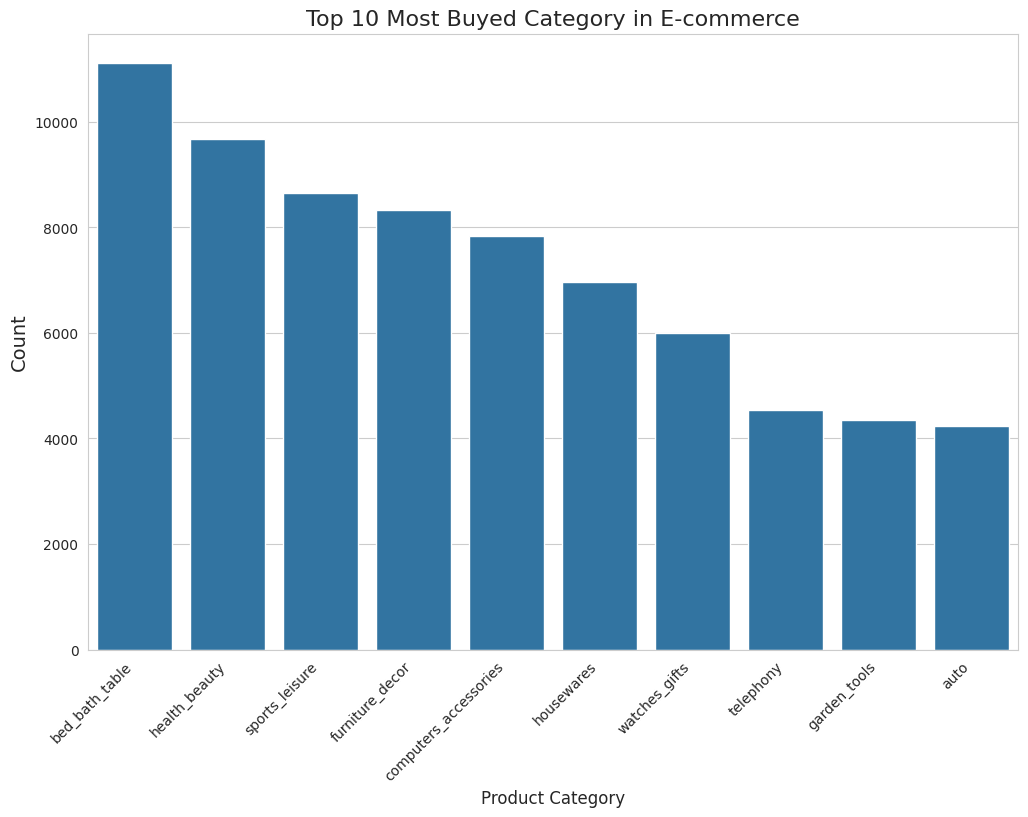

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# Create a horizontal barplot by swapping x and y
barplot = sns.barplot(
    x='product_category_name_english',  
    y='count', 
    data=product_category_counts.head(10)  
)

# Add a title and labels
barplot.set_title('Top 10 Most Buyed Category in E-commerce', fontsize=16)
barplot.set_xlabel('Product Category', fontsize=12)
barplot.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


Bisa kita lihat bahwa walaupun secara state, kategori health and beauty merupakan kategori yang mendominasi, namun secara keseluruhan, kategori bed, bath, and table merupakan kategori yang paling banyak dibeli.

**Insight:**
- Jumlah transaksi terbesar datang dari kota Sao Paolo, diikuti pembayaran dari kota Rio de Janerio sekitar dua sampai tiga kali lipat daripada ranking tiga yaitu Belo Horizonte. Adapun selisih antar ranking selanjutnya cenderung tidak se ekstrim selisih rank 1-2 dan rank 2-3. 
<br>

- Dalam konteks kategori dengan state peminat terbanyak, bisa dilihat bahwa kategori health and beauty mendominasi transaksi di Brazil. Adapun secara keseluruhan, kategori bed, bath, and table merupakan kategori yang paling banyak dibeli.

## Analisis Lanjutan (Opsional)

### Clustering: Binning Spending Per Kota

Pada analisis lanjutan, akan dilakukan binning untuk mengelompokkan kota berdasarkan jumlah payment value total nya. Batasan binning yang digunakan antara lain:
- Kurang dari 1000
- Antara 1000 - 10000
- Antara 10000 - 50000
- Antara 50000 - 100000
- Lebih dari 100000

In [52]:
# Define the bin edges
bins = [0, 1000, 10000, 50000, 100000, float('inf')]
labels = ['< 1000', '1000 - 10000', '10000 - 50000', '50000 - 100000', '> 100000']

#  Create a new column with the bin labels
city_payment_sum_sorted['payment_value_bin'] = pd.cut(city_payment_sum_sorted['payment_value'], bins=bins, labels=labels, right=False)


      payment_value payment_value_bin
3597     2203373.09          > 100000
3155     1161927.36          > 100000
453       421765.12          > 100000
558       354216.78          > 100000
1143      247392.48          > 100000


Selanjutnya, visualisasikan dengan histogram

In [34]:
df_highest

,customer_state,product_category_name_english,row_count
0,AC,furniture_decor,12
1,AL,health_beauty,63
2,AM,health_beauty,20
3,AP,health_beauty,10
4,BA,health_beauty,350
5,CE,health_beauty,167
6,DF,health_beauty,246
7,ES,bed_bath_table,225
8,GO,bed_bath_table,235
9,MA,health_beauty,89


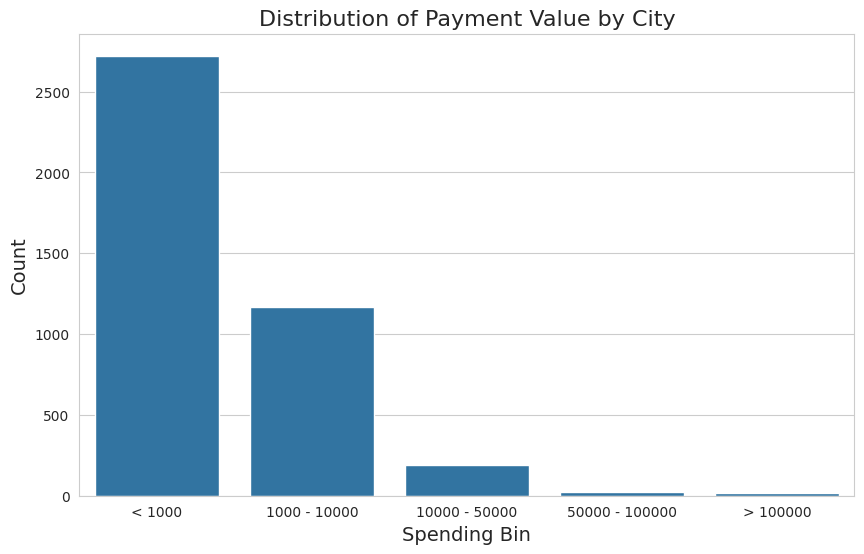

In [55]:
# Hitung frekuensi setiap bin
bin_counts = city_payment_sum_sorted['payment_value_bin'].value_counts().sort_index()

# Membuat histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=bin_counts.index, y=bin_counts.values)

# Menambahkan judul dan label
plt.title('Distribution of Payment Value by City', fontsize=16)
plt.xlabel('Spending Bin', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Tampilkan plot
plt.show()

Bisa dilihat bahwa hanya sedikit kota yang memiliki spending lebih dari 50000. Kebanyakan kota masih memiliki spending kurang dari 1000. 

## Conclusion

- Kota dengan jumlah transaksi terbesar adalah kota San Paolo dengan jumlah transaksi sebesar 2203373.09
- Kategori Health and Beauty merupakan kategori dengan state peminat terbanyak.
- Kategori bed, bath, and table merupakan kategori dengan transaksi terbanyak.